### Moving Beyond Linearity 

Although linear models are relatively simple to describe and implement, the standard linear regression has significant limitaions in terms of predictive power. This is primarily because the linear assumption is almost always an approximation, and sometimes a poor one. <b>[Chapter 7, An Introduction to Statistical Learning]</b>

<b>Book Link</b>: https://www.statlearning.com \
<b>Data Link</b>: https://drive.google.com/file/d/1QIHCTvHQIBpilzbNxGmbdEBEbmEkMd_K/view

In this notebook, we will be working with <b>Polynomial Regression</b>, <b>Step Functions</b> and <b>Regression Splines</b> to discover the relationship between wage and age. 

If we want to relax the linearity assumption but still maintain the linearity assumption, then we can do this by examining very simple extensions of linear models like polynomial regression and step functions, as well as more sophisticated approaches such as splines, local regression, and generalized additive models.

<b>Importing required packages, libraries, and data:</b> 

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from numpy.polynomial import Polynomial 

from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

from math import sqrt

data = pd.read_csv("Wage.csv")
data.columns

Index(['ID', 'year', 'age', 'sex', 'maritl', 'race', 'education', 'region',
       'jobclass', 'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

<b>Creating train and validation sets, and plotting the data to inspect relationship of wage vs age:</b>

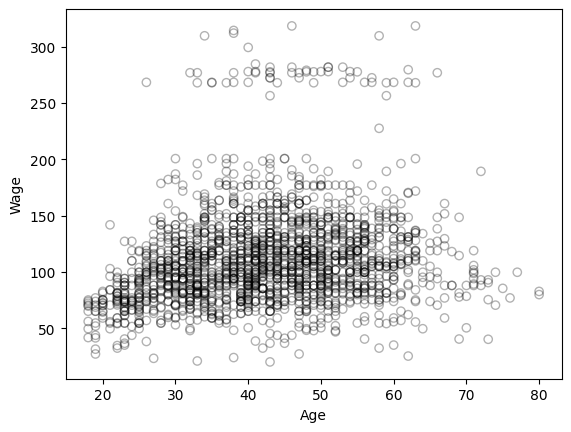

In [4]:
data_x = data['age']
data_y = data['wage']

from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size = 0.33, random_state = 1)

plt.scatter(train_x, train_y, facecolor = 'None', edgecolor = "k", alpha = 0.3)
plt.xlabel('Age')
plt.ylabel('Wage')

plt.show()

From the scatter plot above, it is evident that thinking about positive or negative correlation or no correlation is not straightforrd in this case. If asked to describe the relationship of wage and age here, then it is almost incorrect to say that it is linear. 

<b>Starting with Linear Regression:</b>

In [7]:
# train_x[:3]
# train_x.values.reshape(-1, 1)[:3]
# train_x is a series, need to use values.reshape than just reshape

In [8]:
x = train_x.values.reshape(-1, 1) 
model = LinearRegression()
model.fit(x, train_y)

print("Linear Reg Model Coef:", model.coef_)
print("Linear Reg Model Intercept:", model.intercept_)

Linear Reg Model Coef: [0.72190831]
Linear Reg Model Intercept: 80.65287740759283


<b>Prediction on Validation Set and RMSE calculation:</b>

In [13]:
x2 = valid_x.values.reshape(-1, 1)
pred = model.predict(x2)

rmse = sqrt(mean_squared_error(valid_y, pred))
print("RMSE for Linear Regression:", rmse)

RMSE for Linear Regression: 40.436687488017256


<b>Plotting data and estimated linear regression fit:</b>

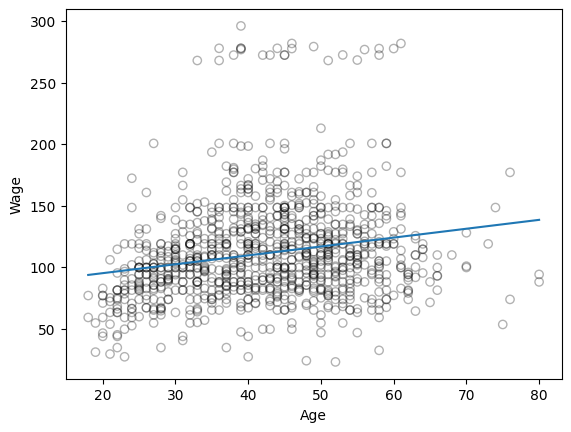

In [14]:
xp = np.linspace(valid_x.min(), valid_x.max(), 70)
xp = xp.reshape(-1, 1)
pred_plot = model.predict(xp)

plt.scatter(valid_x, valid_y, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.plot(xp, pred_plot)
plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()

<b>Moving beyond linearity and experimenting with Polynomial Regression:</b>

Polynomial regression extends the linear model by adding extra pre- dictors, obtained by raising each of the original predictors to a power.

Note: Polynomial and piecewise-constant regression models are in fact special cases of a basis function approach. The idea is to have at hand a fam- ily of functions or transformations that can be applied to a variable X. 

RMSE for Polynomical Regression with Degree 2: 39.44706675604942


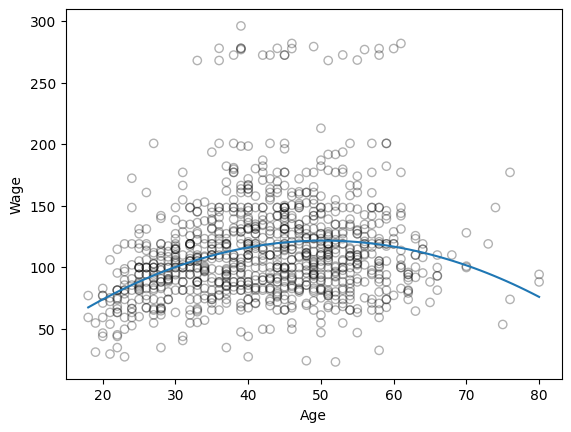

In [20]:
c = Polynomial.fit(train_x, train_y, deg = 2)
pred = c(valid_x) 

print("RMSE for Polynomical Regression with Degree 2:", sqrt(mean_squared_error(valid_y, pred)))

xp = np.linspace(valid_x.min(), valid_x.max(), 70)
pred_plot = c(xp)
plt.scatter(valid_x, valid_y, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.plot(xp, pred_plot)
plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()

RMSE for Polynomical Regression with Degree 4: 39.38061059873873


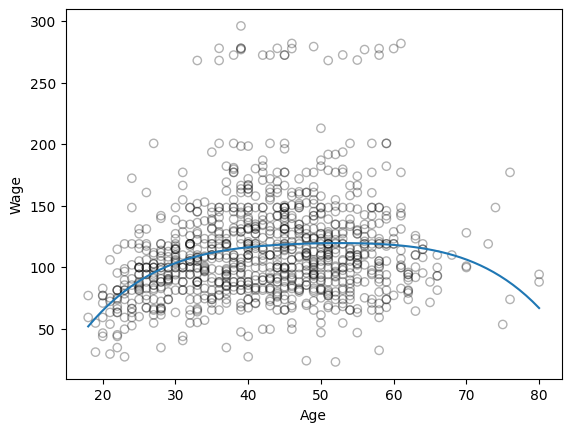

In [21]:
c = Polynomial.fit(train_x, train_y, deg = 4)
pred = c(valid_x) 

print("RMSE for Polynomical Regression with Degree 4:", sqrt(mean_squared_error(valid_y, pred)))

xp = np.linspace(valid_x.min(), valid_x.max(), 70)
pred_plot = c(xp)
plt.scatter(valid_x, valid_y, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.plot(xp, pred_plot)
plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()

Above is a plot of wage against age for the Wage data set, which contains income and demographic information for males who reside in the central Atlantic region of the United States. We see the results of fitting a degree-4 polynomial using least squares (solid blue curve). Even though this is a linear regression model like any other, the individual coefficients are not of particular interest. Instead, we look at the entire fitted function across a grid of 62 values for age from 18 to 80 in order to understand the relationship between age and wage.

RMSE for Polynomical Regression with Degree 12: 39.385107566309934


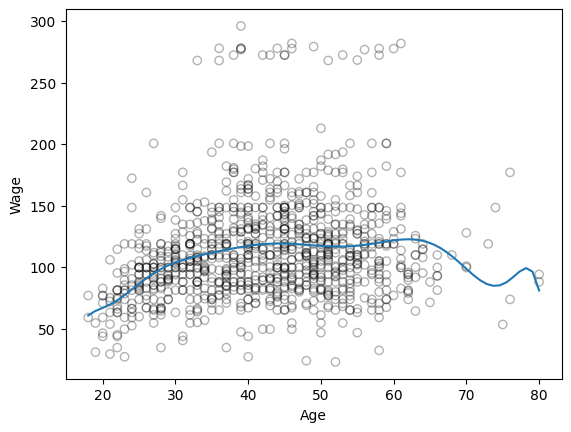

In [22]:
c = Polynomial.fit(train_x, train_y, deg = 12)
pred = c(valid_x) 

print("RMSE for Polynomical Regression with Degree 12:", sqrt(mean_squared_error(valid_y, pred)))

xp = np.linspace(valid_x.min(), valid_x.max(), 70)
pred_plot = c(xp)
plt.scatter(valid_x, valid_y, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.plot(xp, pred_plot)
plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()

RMSE for Polynomical Regression with Degree 16: 39.408375627943684


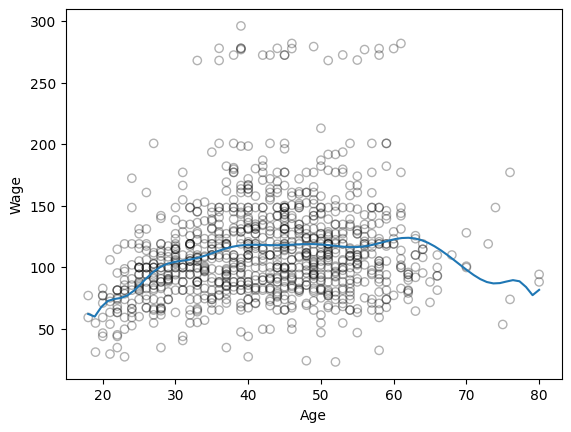

In [23]:
c = Polynomial.fit(train_x, train_y, deg = 16)
pred = c(valid_x) 

print("RMSE for Polynomical Regression with Degree 16:", sqrt(mean_squared_error(valid_y, pred)))

xp = np.linspace(valid_x.min(), valid_x.max(), 70)
pred_plot = c(xp)
plt.scatter(valid_x, valid_y, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.plot(xp, pred_plot)
plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()

RMSE for Polynomical Regression with Degree 25: 39.48489825657954


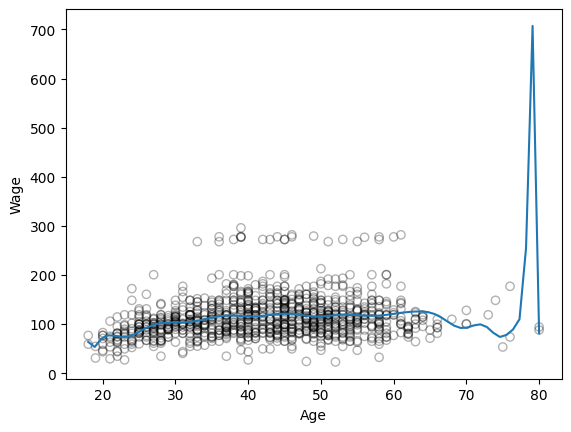

In [24]:
c = Polynomial.fit(train_x, train_y, deg = 25)
pred = c(valid_x) 

print("RMSE for Polynomical Regression with Degree 25:", sqrt(mean_squared_error(valid_y, pred)))

xp = np.linspace(valid_x.min(), valid_x.max(), 70)
pred_plot = c(xp)
plt.scatter(valid_x, valid_y, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.plot(xp, pred_plot)
plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()

RMSE for Polynomical Regression with Degree 30: 39.556884817363496


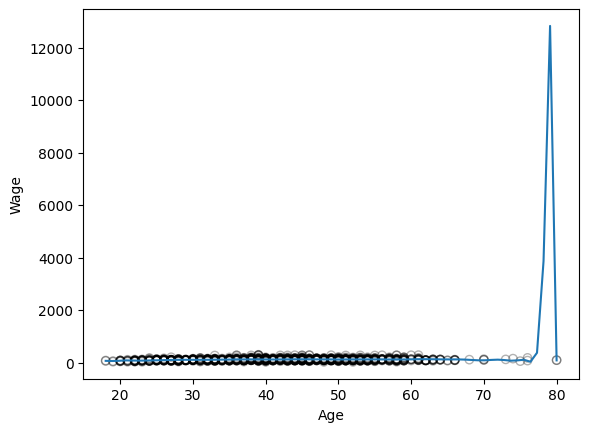

In [25]:
c = Polynomial.fit(train_x, train_y, deg = 30)
pred = c(valid_x) 

print("RMSE for Polynomical Regression with Degree 30:", sqrt(mean_squared_error(valid_y, pred)))

xp = np.linspace(valid_x.min(), valid_x.max(), 70)
pred_plot = c(xp)
plt.scatter(valid_x, valid_y, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.plot(xp, pred_plot)
plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()

Even when we vary the degree of the polynomial fit, the RMSE doesn't improve drastically suggesting that training fit is more and less similar in terms of accuracy for each of the cases above. 

Using polynomial functions of the features as predictors in a linear model imposes a global structure on the non-linear function of X. We can instead use step functions in order to avoid imposing such a global structure. Here we break the range of X into bins, and fit a different constant in each bin. This amounts to converting a continuous variable into an ordered categorical variable.

<b>Now, trying out piecewise step functions:</b> \
Step functions cut the range of a variable into K distinct regions in order to produce a qualitative variable. This has the effect of fitting a piecewise constant function.

Since here we are looking for peicewise fits, we first divide the training data into bins: 

In [28]:
df_cut, bins = pd.cut(train_x, 4, retbins = True, right = True)
df_cut.value_counts(sort = False)

(17.938, 33.5]    504
(33.5, 49.0]      941
(49.0, 64.5]      511
(64.5, 80.0]       54
Name: age, dtype: int64

In [29]:
df_steps = pd.concat([train_x, df_cut, train_y], keys = ['age', 'age_cuts', 'wage'], axis = 1)
df_steps.head()

,age,age_cuts,wage
1382,49,"(33.5, 49.0]",117.146817
23,40,"(33.5, 49.0]",160.642475
2140,55,"(49.0, 64.5]",81.283253
1117,32,"(17.938, 33.5]",94.072715
933,42,"(33.5, 49.0]",75.043154


In [30]:
df_steps_dummies = pd.get_dummies(df_cut)
df_steps_dummies.columns = ['17.938-33.5','33.5-49','49-64.5','64.5-80']
df_steps_dummies.head()

,17.938-33.5,33.5-49,49-64.5,64.5-80
1382,0,1,0,0
23,0,1,0,0
2140,0,0,1,0
1117,1,0,0,0
933,0,1,0,0


<b>Fitting a Generalized Linear Model:</b>

In [33]:
fit3 = sm.GLM(df_steps.wage, df_steps_dummies).fit()
bin_mapping = np.digitize(valid_x, bins)

x_valid = pd.get_dummies(bin_mapping)
x_valid.head()

,1,2,3,4,5
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [34]:
# 5th bucket can be seen as an outlier bucket 
x_valid = pd.get_dummies(bin_mapping).drop([5], axis = 1)
pred2 = fit3.predict(x_valid)

In [36]:
print("RMSE for GLM:", sqrt(mean_squared_error(valid_y, pred2)))

RMSE for GLM: 39.990600783110395


<b>Plotting the piecewise constant fit:</b>

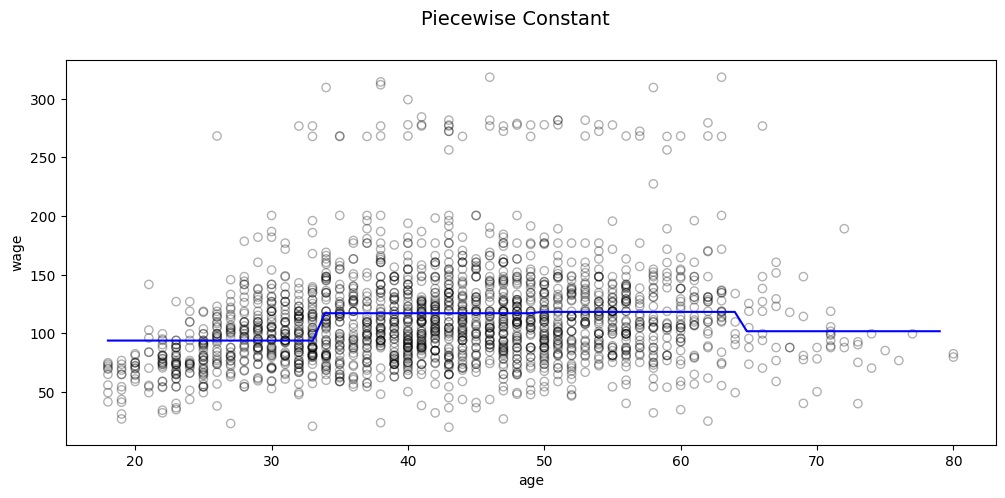

In [38]:
xp = np.linspace(valid_x.min(),valid_x.max()-1,70) 
bin_mapping = np.digitize(xp, bins) 
X_valid_2 = pd.get_dummies(bin_mapping) 
pred2 = fit3.predict(X_valid_2)

fig, (ax1) = plt.subplots(1,1, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

ax1.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(xp, pred2, c='b')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
plt.show()

Unfortunately, unless there are natural breakpoints in the predictors, piecewise-constant functions can miss the action. In the plot above, the first bin clearly misses the increasing trend of wage with age.

In [39]:
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 2010
Model:                            GLM   Df Residuals:                     2006
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          1660.2
Method:                          IRLS   Log-Likelihood:                -10302.
Date:                Wed, 28 Dec 2022   Deviance:                   3.3303e+06
Time:                        13:45:29   Pearson chi2:                 3.33e+06
No. Iterations:                     3   Pseudo R-squ. (CS):            0.06243
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
17.938-33.5    93.9388      1.815     51.758      0.000      90.382      97.496
33.5-49       117.2185      1.328     88.249      0.000     114.615     119.822
49-64.5       118.3589      1.802     65.665      0.000     114.826     121.892
64.5-80       101.8875      5.545     18.375      0.000      91.020     112.755
===============================================================================
"""

Thus far we have considered the use of polynomial functions and piecewise constant functions for our basis functions; however, many alternatives are possible. For instance, we can use wavelets or Fourier series to construct basis functions. In the next section, we investigate a very common choice for a basis function: regression splines. 

Important to note the understanding of the following in context of Regression Splines: 1. Piecewise polynomials, 2. Constrainsts and Splines, 3. Spline Basis Representation 4. Choosing Number and Location of the Knots. 

Some notes presented here: 

1. Instead of fitting a high-degree polynomial over the entire range of X, piece- wise polynomial regression involves fitting separate low-degree polynomials over different regions of X. The points where the coefficients change are called knots. In other words, we fit two different polynomial functions to the data, one on the subset of the observations with xi < c, and one on the subset of the observations with xi ≥ c. Using more knots leads to a more flexible piecewise polynomial. In general, if we place K different knots throughout the range of X, then we will end up fitting K + 1 different cubic polynomials. Note that we do not need to use a cubic polynomial. For example, we can instead fit piecewise linear functions (degree 0). 

2. Each constraint that we impose on the piecewise cubic polynomials effectively frees up one degree of freedom, by reducing the complexity of the resulting piecewise polynomial fit. In general, a cubic spline with K knots uses cubic spline a total of 4 + K degrees of freedom. The general definition of a degree-d spline is that it is a piecewise degree-d polynomial, with continuity in derivatives up to degree d − 1 at each knot. Therefore, a linear spline is obtained by fitting a line in each region of the predictor space defined by the knots, requiring continuity at each knot.

<b>Finally coming to Regression Splines:</b> 

Regression splines are more flexible than polynomials and step functions, and in fact are an extension of the two. They involve di- viding the range of X into K distinct regions. Within each region, a polynomial function is fit to the data. However, these polynomials are constrained so that they join smoothly at the region boundaries, or knots. Provided that the interval is divided into enough regions, this can produce an extremely flexible fit.

Here we will first create a cubic spline with 3 and 4 knots to transform a data set and fit GLM to that. 

In [40]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 3 knots 
transformed_x = dmatrix("bs(train, knots = (25, 40, 60), degree = 3, include_intercept = False)", 
                        {"train": train_x}, return_type = 'dataframe')

fit1 = sm.GLM(train_y, transformed_x).fit()

# 4 knots
transformed_x2 = dmatrix("bs(train, knots = (25, 40, 60, 65), degree = 3, include_intercept = False)", 
                         {"train": train_x}, return_type = 'dataframe')

fit2 = sm.GLM(train_y, transformed_x2).fit()

pred1 = fit1.predict(dmatrix("bs(valid, knots = (25, 40, 60), degree = 3, include_intercept = False)", 
                             {"valid": valid_x}, return_type = 'dataframe'))

pred2 = fit2.predict(dmatrix("bs(valid, knots = (25, 40, 60, 65), degree = 3, include_intercept = False)", 
                             {"valid": valid_x}, return_type = 'dataframe'))

rmse1 = sqrt(mean_squared_error(valid_y, pred1))
rmse2 = sqrt(mean_squared_error(valid_y, pred2))

print("RMSE for Cubic Spline with 3 Knots:", rmse1)
print("RMSE for Cubic Spline with 4 Knots:", rmse2)

RMSE for Cubic Spline with 3 Knots: 39.403187683411254
RMSE for Cubic Spline with 4 Knots: 39.42594707809301


<b>Plotting both the fits:</b>

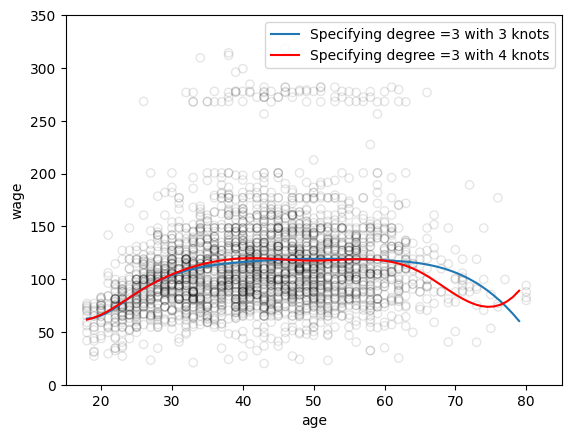

In [42]:
pred1 = fit1.predict(dmatrix("bs(xp, knots=(25,40,60), include_intercept=False)", 
                                 {"xp": xp}, return_type='dataframe'))

pred2 = fit2.predict(dmatrix("bs(xp, knots=(25,40,50,65),degree =3, include_intercept=False)", 
                                 {"xp": xp}, return_type='dataframe'))

# Plot the splines and error bands

plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.1)

plt.plot(xp, pred1, label='Specifying degree =3 with 3 knots')
plt.plot(xp, pred2, color='r', label='Specifying degree =3 with 4 knots')
plt.legend()

plt.xlim(15, 85)
plt.ylim(0, 350)

plt.xlabel('age')
plt.ylabel('wage')

plt.show()

<b>Now, to smooth the polynomial beyond the boundary knots, we use a Natural Spline:</b>

A natural spline is a regression spline with additional boundary constraints: the function is required to be linear at the boundary (in the region where X is smaller than the smallest knot, or larger than the largest knot). This additional constraint means that natural splines generally produce more stable estimates at the boundaries. 

In [44]:
# Generating natural cubic spline
transformed_x3 = dmatrix("cr(train, df = 3)", {"train": train_x}, return_type='dataframe')
fit3 = sm.GLM(train_y, transformed_x3).fit()

# Prediction on validation set
pred3 = fit3.predict(dmatrix("cr(valid, df=3)", {"valid": valid_x}, return_type='dataframe'))

print("RMSE for Natural Spline:", sqrt(mean_squared_error(valid_y, pred3)))

RMSE for Natural Spline: 39.44823813743623


<b>Generating the fit plot:</b>

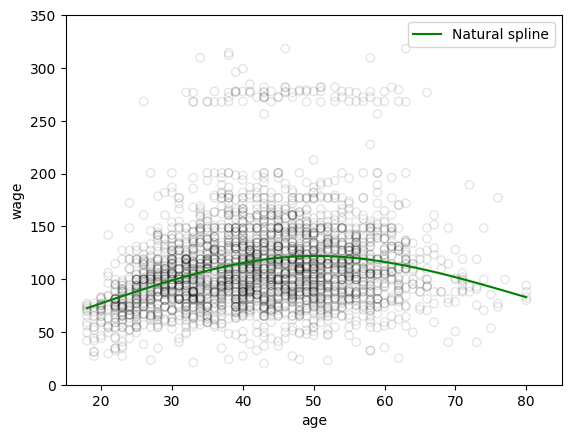

In [45]:
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred3 = fit3.predict(dmatrix("cr(xp, df=3)", {"xp": xp}, return_type='dataframe'))

plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.1)

plt.plot(xp, pred3,color='g', label='Natural spline')
plt.legend()

plt.xlim(15,85)
plt.ylim(0,350)

plt.xlabel('age')
plt.ylabel('wage')
plt.show()

<b>Extras:</b>

In [ ]:
train_x = train_x.values.reshape(-1, 1)
valid_x = valid_x.values.reshape(-1, 1)

In [78]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state = 1, max_iter = 500).fit(train_x, train_y)
pred = regr.predict(valid_x)
print("RMSE for MLP:", sqrt(mean_squared_error(valid_y, pred)))

RMSE for MLP: 40.5061890658415


In [69]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth = 3, random_state=0).fit(train_x, train_y)
pred = regr.predict(valid_x)
print("RMSE for MLP:", sqrt(mean_squared_error(valid_y, pred)))

RMSE for MLP: 39.39955576934967


In [77]:
from sklearn import ensemble
params = {"n_estimators": 500, "max_depth": 4, "min_samples_split": 5, "learning_rate": 0.01,
                                                                            "loss": "squared_error",}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(train_x, train_y)
pred = reg.predict(valid_x)
print("RMSE for MLP:", sqrt(mean_squared_error(valid_y, pred)))

RMSE for MLP: 39.705682559412125


<b>Reference Links:</b>
1. https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/ 
2. https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html 
3. https://www.analyticsvidhya.com/blog/2021/05/4-ways-to-evaluate-your-machine-learning-model-cross-validation-techniques-with-python-code/ 
4. https://numpy.org/doc/stable/reference/routines.polynomials.package.html#module-numpy.polynomial
5. https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html
6. https://www.statsmodels.org/stable/glm.html
7. https://patsy.readthedocs.io/en/latest/spline-regression.html
8. https://en.wikipedia.org/wiki/Piecewise